In [137]:
import numpy as np
import tensorflow as tf

# Zad.
Wczytaj dane i narysuj je na wykresie.

In [138]:
data = np.loadtxt("life_satisfaction.csv",
                  dtype=np.float32,
                  delimiter=",",
                  skiprows=1,
                  usecols=[1, 2])
X_train = data[:, 0:1] / 10000 # feature scaling
y_train = data[:, 1:2]

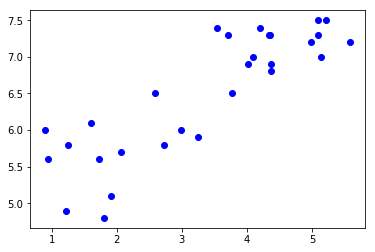

(29, 1)


In [139]:
import matplotlib.pyplot as plt

plt.plot(X_train, y_train, "bo")
plt.show()
print(X_train.shape)

# Zad 
Wykonaj regresię za pomocą Scikit-Learn.

In [140]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(np.r_[lin_reg.intercept_.reshape(-1, 1), lin_reg.coef_.T])

[[4.853052  ]
 [0.49115452]]


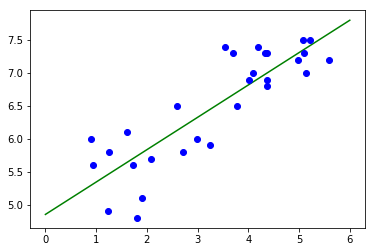

In [141]:
f_lr = lambda x: lin_reg.coef_[0][0] * x +lin_reg.intercept_[0]

x_f_lr = np.linspace(0., 6, 200)
y_f_lr = f_lr(x_f_lr)
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(X_train, y_train, 'bo');
plt.show()

# Zad.
Wykonaj regresię za pomocą TensorFlow.

In [142]:
data_plus_bias  = np.c_[np.ones((X_train.shape[0], 1)), X_train]
data_m, data_n = data_plus_bias.shape
print(data_m, data_n)

X = tf.constant(data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(y_train.reshape(-1, 1), dtype=tf.float32, name="y")

XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)
with tf.Session() as sess:
    theta_value = theta.eval()
    print(theta_value)

29 2
[[4.853052 ]
 [0.4911556]]


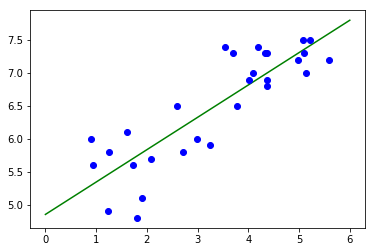

In [143]:
f_lr = lambda x: theta_value[1] * x + theta_value[0][0]

x_f_lr = np.linspace(0., 6, 200)
y_f_lr = f_lr(x_f_lr)
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(X_train, y_train, 'bo');
plt.show()

# Implementing Gradient Descent

Możemy zminimalizować funkcję kosztu gradientowo wykorzystując gradient: 


```python
gradients = 2/m * tf.matmul(tf.transpose(X), error)
```

In [144]:
tf.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(y_train.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")

y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/data_m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()
    print(best_theta)

Epoch 0 MSE = 19.612455
Epoch 100 MSE = 1.3545243
Epoch 200 MSE = 0.8315496
Epoch 300 MSE = 0.54158586
Epoch 400 MSE = 0.38081592
Epoch 500 MSE = 0.29167664
Epoch 600 MSE = 0.24225356
Epoch 700 MSE = 0.21485056
Epoch 800 MSE = 0.19965717
Epoch 900 MSE = 0.19123314
[[4.660542  ]
 [0.54031867]]


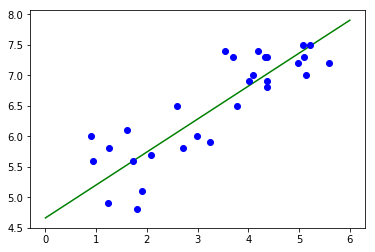

In [145]:
f_lr = lambda x: best_theta[1] * x + best_theta[0]

x_f_lr = np.linspace(0., 6, 200)
y_f_lr = f_lr(x_f_lr)
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(X_train, y_train, 'bo');
plt.show()

# Zad.

Proszę narysować wykres zmiany funkcji kosztu

In [146]:
tf.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01
error_array=[]

X = tf.constant(data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(y_train.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")

y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/data_m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        error_array.append(mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()
    print(best_theta)

Epoch 0 MSE = 19.612455
Epoch 100 MSE = 1.3545243
Epoch 200 MSE = 0.8315496
Epoch 300 MSE = 0.54158586
Epoch 400 MSE = 0.38081592
Epoch 500 MSE = 0.29167664
Epoch 600 MSE = 0.24225356
Epoch 700 MSE = 0.21485056
Epoch 800 MSE = 0.19965717
Epoch 900 MSE = 0.19123314
[[4.660542  ]
 [0.54031867]]


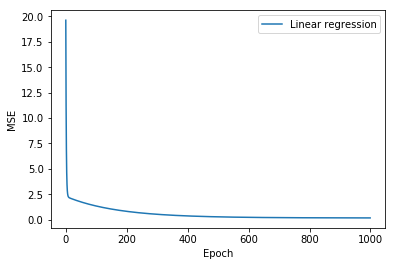

In [147]:
plt.figure()
plt.plot(error_array, label='Linear regression')
#plt.semilogy(error_array, label='Linear regression')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

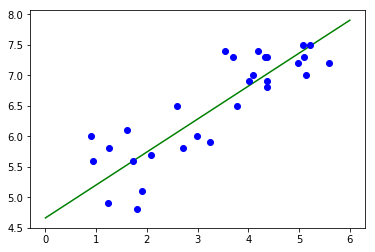

In [148]:
f_lr = lambda x: best_theta[1] * x + best_theta[0]

x_f_lr = np.linspace(0., 6, 200)
y_f_lr = f_lr(x_f_lr)
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(X_train, y_train, 'bo');
plt.show()

# Automatyczne różniczkowanie

  * Aby zrozumieć dlaczego, rozważ funkcję 
$$
f (x) = exp (exp (exp (x))).
$$
  * Możesz obliczyć jej pochodną 
$$
f'(x) = exp (x) \cdot exp (exp (x)) \cdot exp (exp (exp (x))).
$$
  * Wydajnym rozwiązaniem będzie napisanie funkcji, 
    * która najpierw oblicza $exp (x)$, 
    * następnie $exp (exp (x))$, 
    * astępnie $exp (exp (exp (x)))$ 
    
  i zwraca wszystkie trzy. 
  * To daje Ci $f(x)$ bezpośrednio (trzeci człon), a jeśli potrzebujesz pochodnej możesz po prostu pomnożyć wszystkie trzy elemnty i gotowe.
  * Przy naiwnym podejściu musiałbyś wywołać funkcję $exp$ dziewięć razy, aby obliczyć zarówno $f(x)$, jak i $f'(x)$. Przy takim podejściu wystarczy wywołać to trzy razy.

# Zadanie
Można znaleźć pochodne cząstkowe poniższej funkcji w odniesieniu do a i b

```python
tf.gradients
```

In [149]:
def my_func(a, b):
    z = 0
    for i in range(100):
        z = a * np.cos(z + i) + z * np.sin(b - i)
    return z

my_func(0.2, 0.3)

-0.21253923284754914

In [150]:
tf.reset_default_graph()

a = tf.Variable(0.2, name="a")
b = tf.Variable(0.3, name="b")
z = tf.constant(0.0, name="z0")
for i in range(100):
    z = a * tf.cos(z + i) + z * tf.sin(b - i)

grads = tf.gradients(z, [a, b])
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    print(z.eval())
    print(sess.run(grads))

-0.21253741
[-1.1388494, 0.19671395]


# Zad

Możemy też użyć gradientu wyliczonego za pomocą automatycznego różniczkowania

```python
gradients = tf.gradients(mse, [theta])[0]
```


In [151]:
tf.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(y_train.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")

y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

gradients = tf.gradients(mse, [theta])[0]

training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 19.612455
Epoch 100 MSE = 1.3545243
Epoch 200 MSE = 0.8315496
Epoch 300 MSE = 0.54158574
Epoch 400 MSE = 0.3808158
Epoch 500 MSE = 0.29167664
Epoch 600 MSE = 0.24225356
Epoch 700 MSE = 0.21485056
Epoch 800 MSE = 0.19965717
Epoch 900 MSE = 0.19123314
Best theta:
[[4.660542  ]
 [0.54031867]]


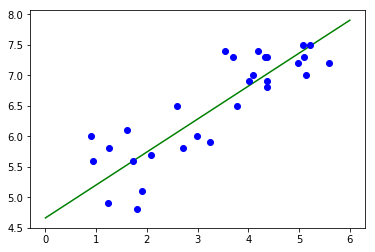

In [153]:
f_lr = lambda x: best_theta[1] * x + best_theta[0]

x_f_lr = np.linspace(0., 6, 200)
y_f_lr = f_lr(x_f_lr)
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(X_train, y_train, 'bo');
plt.show()

# Zad.

Proszę narysować wykres zmiany funkcji kosztu

In [154]:
tf.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01
error_array=[]

X = tf.constant(data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(y_train.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")

y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

gradients = tf.gradients(mse, [theta])[0]

training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        error_array.append(mse.eval())    
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 19.612455
Epoch 100 MSE = 1.3545243
Epoch 200 MSE = 0.8315496
Epoch 300 MSE = 0.54158574
Epoch 400 MSE = 0.3808158
Epoch 500 MSE = 0.29167664
Epoch 600 MSE = 0.24225356
Epoch 700 MSE = 0.21485056
Epoch 800 MSE = 0.19965717
Epoch 900 MSE = 0.19123314
Best theta:
[[4.660542  ]
 [0.54031867]]


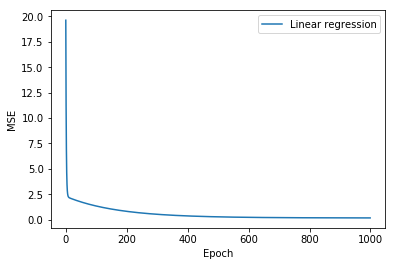

In [155]:
plt.figure()
plt.plot(error_array, label='Linear regression')
#plt.semilogy(error_array, label='Linear regression')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Korzystanie z Optymalizatora

  * TensorFlow oblicza gradienty dla ciebie.
  * Ale możesz użyć optymalizatora. TensorFlow dostarcza wiele optymalizatorów, w tym optymalizator Gradient Descent.
  

```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)
```  


In [158]:
tf.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(y_train.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")

y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 19.612455
Epoch 100 MSE = 1.3545243
Epoch 200 MSE = 0.8315496
Epoch 300 MSE = 0.54158574
Epoch 400 MSE = 0.3808158
Epoch 500 MSE = 0.29167664
Epoch 600 MSE = 0.24225356
Epoch 700 MSE = 0.21485056
Epoch 800 MSE = 0.19965717
Epoch 900 MSE = 0.19123314
Best theta:
[[4.660542  ]
 [0.54031867]]


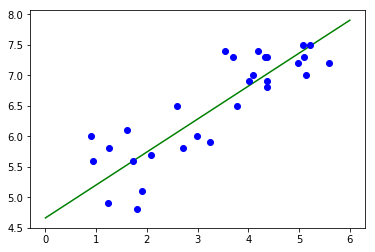

In [159]:
f_lr = lambda x: best_theta[1] * x + best_theta[0]

x_f_lr = np.linspace(0., 6, 200)
y_f_lr = f_lr(x_f_lr)
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(X_train, y_train, 'bo');
plt.show()

Jeśli chcesz użyć innego rodzaju optymalizatora, wystarczy zmienić jedną linię. Na przykład, możesz użyć optymalizatora momentum

```python
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)
training_op = optimizer.minimize(mse)
```

In [160]:
tf.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(y_train.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")

y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)
training_op = optimizer.minimize(mse)


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 19.612455
Epoch 100 MSE = 0.18110882
Epoch 200 MSE = 0.18075033
Epoch 300 MSE = 0.18075036
Epoch 400 MSE = 0.18075037
Epoch 500 MSE = 0.18075036
Epoch 600 MSE = 0.18075037
Epoch 700 MSE = 0.18075036
Epoch 800 MSE = 0.18075037
Epoch 900 MSE = 0.18075037
Best theta:
[[4.853055 ]
 [0.4911539]]


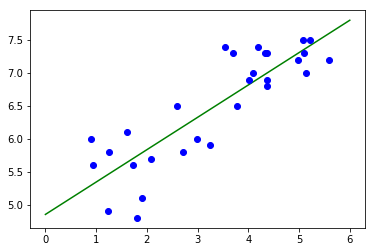

In [161]:
f_lr = lambda x: best_theta[1] * x + best_theta[0]

x_f_lr = np.linspace(0., 6, 200)
y_f_lr = f_lr(x_f_lr)
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(X_train, y_train, 'bo');
plt.show()

# Zad.
Proszę narysować wykres zmiany funkcji kosztu w przypadku:

  * Gradient Descent
  * Momentum

In [126]:
tf.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01
error_array_g=[]
error_array_m=[]

X = tf.constant(data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(y_train.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")

y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        error_array_g.append(mse.eval()) 
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 19.612455
Epoch 100 MSE = 1.3545243
Epoch 200 MSE = 0.8315496
Epoch 300 MSE = 0.54158574
Epoch 400 MSE = 0.3808158
Epoch 500 MSE = 0.29167664
Epoch 600 MSE = 0.24225356
Epoch 700 MSE = 0.21485056
Epoch 800 MSE = 0.19965717
Epoch 900 MSE = 0.19123314
Best theta:
[[4.660542  ]
 [0.54031867]]


In [127]:
tf.reset_default_graph()

X = tf.constant(data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(y_train.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")

y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)
training_op = optimizer.minimize(mse)


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        error_array_m.append(mse.eval()) 
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 19.612455
Epoch 100 MSE = 0.18110882
Epoch 200 MSE = 0.18075033
Epoch 300 MSE = 0.18075036
Epoch 400 MSE = 0.18075037
Epoch 500 MSE = 0.18075036
Epoch 600 MSE = 0.18075037
Epoch 700 MSE = 0.18075036
Epoch 800 MSE = 0.18075037
Epoch 900 MSE = 0.18075037
Best theta:
[[4.853055 ]
 [0.4911539]]


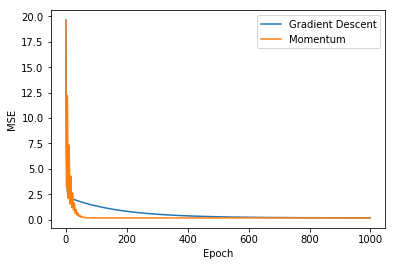

In [128]:
plt.figure()
plt.plot(error_array_g, label='Gradient Descent')
plt.plot(error_array_m, label='Momentum')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

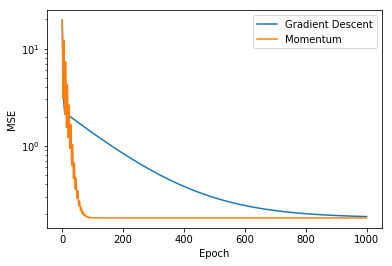

In [129]:
plt.figure()
plt.semilogy(error_array_g, label='Gradient Descent')
plt.semilogy(error_array_m, label='Momentum')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Warstwa typu placeholder

Warstwa typu placeholder pozwala na dynamiczne dostarczanie danych

In [130]:
tf.reset_default_graph()

A = tf.placeholder(tf.float32, shape=(None, 3))
B = A + 5
with tf.Session() as sess:
    B_val_1 = B.eval(feed_dict={A: [[1, 2, 3]]})
    B_val_2 = B.eval(feed_dict={A: [[4, 5, 6], [7, 8, 9]]})

print(B_val_1)
print(B_val_2)

[[6. 7. 8.]]
[[ 9. 10. 11.]
 [12. 13. 14.]]


#  Mini-batch Gradient Descent.

Spróbujmy zmodyfikować poprzedni kod, aby zaimplementować **Mini-batch Gradient Descent**.

  * W tym celu potrzebujemy sposobu na zastąpienie $X$ i $y$ przy każdej iteracji następną mini-serią.
  * Najprostszym sposobem na to jest użycie węzłów typu **placeholder**.
  * Węzły te są specjalne, ponieważ w rzeczywistości nie wykonują żadnych obliczeń, po prostu wyprowadzają dane, które przekazują do działania w środowisku.

In [162]:
tf.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, data_n), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [163]:
n_epochs = 1000
batch_size = 64

n_batches = int(np.ceil(data_m / batch_size))

#from sklearn.utils import shuffle
#shuffled_input = shuffle(input_x)
#X_batches = np.array_split(shuffled_input, iterations_in_epoch)

def fetch_batch(epoch, batch_index, batch_size, m):
    np.random.seed(epoch * n_batches + batch_index)  
    indices = np.random.randint(m, size=batch_size)  
    X_batch = data_plus_bias[indices] 
    y_batch = y_train[indices] 
    return X_batch, y_batch

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size, data_m)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 10 == 0:
            print("Epoch", epoch, "MSE =", sess.run( mse, feed_dict={X: X_batch, y: y_batch}) )   

    best_theta = theta.eval()
    save_path = saver.save(sess, "/tmp/my_model_final.ckpt")
    
print("Best theta:")
print(best_theta)

Epoch 0 MSE = 12.097157
Epoch 10 MSE = 2.0466433
Epoch 20 MSE = 1.6781869
Epoch 30 MSE = 1.7865386
Epoch 40 MSE = 1.6996499
Epoch 50 MSE = 2.2697115
Epoch 60 MSE = 2.0013037
Epoch 70 MSE = 1.3288851
Epoch 80 MSE = 1.3103607
Epoch 90 MSE = 1.6212525
Epoch 100 MSE = 1.1508999
Epoch 110 MSE = 1.4819145
Epoch 120 MSE = 1.2671795
Epoch 130 MSE = 0.9977313
Epoch 140 MSE = 1.1898271
Epoch 150 MSE = 1.0487572
Epoch 160 MSE = 0.7093979
Epoch 170 MSE = 1.0229049
Epoch 180 MSE = 0.43554628
Epoch 190 MSE = 0.89501345
Epoch 200 MSE = 0.8880118
Epoch 210 MSE = 0.90786755
Epoch 220 MSE = 0.8588608
Epoch 230 MSE = 0.5839655
Epoch 240 MSE = 0.65657693
Epoch 250 MSE = 0.64517707
Epoch 260 MSE = 0.50037426
Epoch 270 MSE = 0.6631206
Epoch 280 MSE = 0.76275206
Epoch 290 MSE = 0.44752637
Epoch 300 MSE = 0.4714136
Epoch 310 MSE = 0.5403518
Epoch 320 MSE = 0.43073872
Epoch 330 MSE = 0.4121586
Epoch 340 MSE = 0.56471807
Epoch 350 MSE = 0.436838
Epoch 360 MSE = 0.44344163
Epoch 370 MSE = 0.30336383
Epoch 380 MS

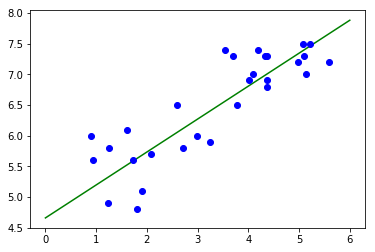

In [164]:
f_lr = lambda x: best_theta[1] * x + best_theta[0]

x_f_lr = np.linspace(0., 6, 200)
y_f_lr = f_lr(x_f_lr)
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(X_train, y_train, 'bo');
plt.show()

# Zad.
Proszę narysować wykres zmiany funkcji kosztu w przypadku:
  * Gradient Descent
  * Momentum

In [133]:
tf.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01

error_array_g_b=[]
error_array_m_b=[]

batch_error_array_g=[]
batch_error_array_m=[]

X = tf.placeholder(tf.float32, shape=(None, data_n), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

n_epochs = 1000
batch_size = 64

n_batches = int(np.ceil(data_m / batch_size))

def fetch_batch(epoch, batch_index, batch_size, m):
    np.random.seed(epoch * n_batches + batch_index)  
    indices = np.random.randint(m, size=batch_size)  
    X_batch = data_plus_bias[indices] 
    y_batch = y_train[indices] 
    return X_batch, y_batch

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size, data_m)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", sess.run( mse, feed_dict={X: X_batch, y: y_batch}) )   
        
            batch_error_array_g.append( sess.run( mse, feed_dict={X: X_batch, y: y_batch}) )
            error_array_g_b.append( sess.run( mse, feed_dict={X: data_plus_bias, y: y_train}) )            
    
    best_theta = theta.eval()
    save_path = saver.save(sess, "/tmp/my_model_final.ckpt")
    
print("Best theta:")
print(best_theta)

Epoch 0 MSE = 12.097157
Epoch 100 MSE = 1.1508999
Epoch 200 MSE = 0.8880118
Epoch 300 MSE = 0.4714136
Epoch 400 MSE = 0.34859473
Epoch 500 MSE = 0.29669154
Epoch 600 MSE = 0.19559914
Epoch 700 MSE = 0.1530667
Epoch 800 MSE = 0.17522311
Epoch 900 MSE = 0.19383548
Best theta:
[[4.659411 ]
 [0.5371784]]


In [134]:
tf.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, data_n), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

n_epochs = 1000
batch_size = 64

n_batches = int(np.ceil(data_m / batch_size))

def fetch_batch(epoch, batch_index, batch_size, m):
    np.random.seed(epoch * n_batches + batch_index)  
    indices = np.random.randint(m, size=batch_size)  
    X_batch = data_plus_bias[indices] 
    y_batch = y_train[indices] 
    return X_batch, y_batch

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size, data_m)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", sess.run( mse, feed_dict={X: X_batch, y: y_batch}) )   
        
            batch_error_array_m.append( sess.run( mse, feed_dict={X: X_batch, y: y_batch}) )
            error_array_m_b.append( sess.run( mse, feed_dict={X: data_plus_bias, y: y_train}) )            
    
    best_theta = theta.eval()
    save_path = saver.save(sess, "/tmp/my_model_final.ckpt")
    
print("Best theta:")
print(best_theta)

Epoch 0 MSE = 12.097157
Epoch 100 MSE = 0.17924872
Epoch 200 MSE = 0.19238098
Epoch 300 MSE = 0.15407556
Epoch 400 MSE = 0.19533752
Epoch 500 MSE = 0.19952081
Epoch 600 MSE = 0.18004185
Epoch 700 MSE = 0.14085622
Epoch 800 MSE = 0.15857491
Epoch 900 MSE = 0.18083863
Best theta:
[[4.8188486 ]
 [0.48695064]]


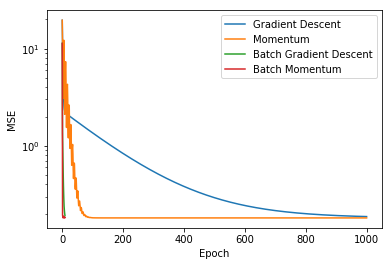

In [135]:
plt.figure()
plt.semilogy(error_array_g, label='Gradient Descent')
plt.semilogy(error_array_m, label='Momentum')
plt.semilogy(error_array_g_b, label='Batch Gradient Descent')
plt.semilogy(error_array_m_b, label='Batch Momentum')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

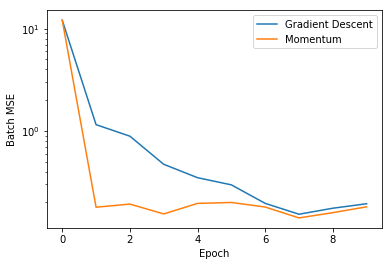

In [136]:
plt.figure()
plt.semilogy(batch_error_array_g, label='Gradient Descent')
plt.semilogy(batch_error_array_m, label='Momentum')
plt.xlabel('Epoch')
plt.ylabel('Batch MSE')
plt.legend()
plt.show()